# CS103 Project - Logistic Regression

The logistic regression model is a statistical model used to predict a **binary outcome**. It is a statistical method used to model the relationship between one or more independent variables and a binary dependent variable — that is, an outcome that has two possible values, such as "yes/no" or "success/failure." Unlike linear regression, which predicts a continuous value, logistic regression predicts the probability that a given input belongs to a particular category. It does this by applying the logistic (sigmoid) function to transform the output of a linear combination of the input variables into a value between 0 and 1, representing a probability. The sigmoid function is given by:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

This makes logistic regression widely used in fields like medicine, finance, and machine learning for classification problems such as disease prediction, spam detection, and customer churn analysis. Below is the comparison between linear regression and logistic regression.

In [39]:
# Define all imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


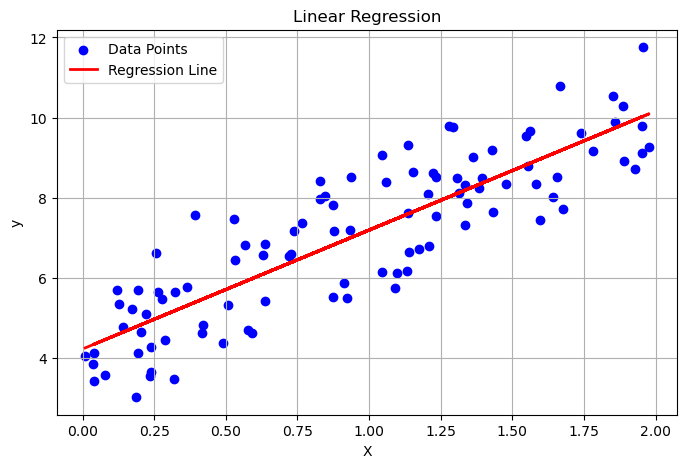

In [40]:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # feature values
y = 4 + 3 * X + np.random.randn(100, 1)  # target values with some noise

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()



In [41]:
# Define the sigmoid helper function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

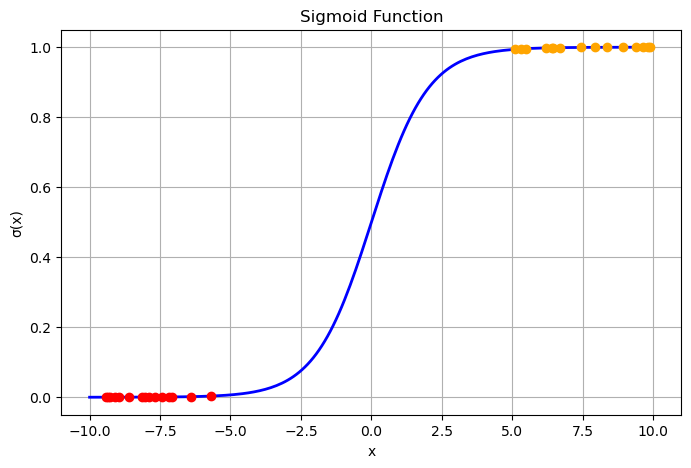

In [42]:
# Generate x values for the curve
x = np.linspace(-10, 10, 200)
y = sigmoid(x)

# Generate sample points concentrated near 0 and near 1
x_near_0 = np.random.uniform(-10, -5, 15)  # points where sigmoid ~ 0
x_middle = np.random.uniform(-2, 2, 10)    # points where sigmoid ~ 0.5
x_near_1 = np.random.uniform(5, 10, 15)    # points where sigmoid ~ 1

# Compute sigmoid values for these points
y_near_0 = sigmoid(x_near_0)
y_middle = sigmoid(x_middle)
y_near_1 = sigmoid(x_near_1)

# Plot the sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2)

# Plot sample points
plt.scatter(x_near_0, y_near_0, color='red', zorder=5)
plt.scatter(x_near_1, y_near_1, color='orange', zorder=5)

# Labels and title
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()


 The sigmoid function is primarily used to map any real-valued number into a probability-like value between 0 and 1, making it particularly useful in fields like statistics, machine learning, and neural networks. Its smooth, S-shaped curve ensures that extreme negative inputs produce outputs close to 0, extreme positive inputs produce outputs close to 1, and values near zero produce outputs near 0.5. This property allows the sigmoid function to act as a **squashing function**, compressing unbounded input values into a finite range, which is essential for modeling probabilities and making binary classifications. In logistic regression, the sigmoid function converts the linear combination of input features into a probability that an event belongs to a particular class, while in neural networks, it helps introduce non-linearity, enabling the model to capture complex patterns in the data.

## Connection to Linear Algebra

1. **Data Representation as Matrices**  
   Represent the inputs as a matrix $X$ of size $n \times m$, where $n$ is the number of samples and $m$ is the number of features.  
   
   $$ 
   X = 
   \begin{bmatrix}
   x_{11} & x_{12} & \dots & x_{1m} \\
   x_{21} & x_{22} & \dots & x_{2m} \\
   \vdots & \vdots & \ddots & \vdots \\
   x_{n1} & x_{n2} & \dots & x_{nm}
   \end{bmatrix}
   $$
   
   Weights are represented as a vector $w$ of size $m \times 1$:
   
   $$w = 
   \begin{bmatrix}
   w_1 \\
   w_2 \\
   \vdots \\
   w_m
   \end{bmatrix}$$

2. **Linear Combination in Matrix Form**  
   Compute the linear combination of inputs and weights using matrix multiplication:
   
   $$z = X w$$
   
   Here, $z$ is an $n \times 1$ vector where each entry corresponds to a sample:  
   
   $$z_i = w_1 x_{i1} + w_2 x_{i2} + \dots + w_m x_{im}$$

3. **Gradient Descent Using Matrices**  
   The gradient of the binary cross-entropy loss can be computed efficiently using matrices:
   
   $$\nabla_w L = \frac{1}{n} X^T (\hat{y} - y)$$
   
   This allows vectorized updates of the weight vector $w$ during gradient descent.

## Example: Logistic Regression Example: Predicting Purchase of a Premium Online Subscription

### Explanation

This example simulates a **logistic regression scenario** where we are trying to predict whether a person will **purchase a premium online subscription service** (such as a fitness app, streaming platform, or software tool) based on multiple independent variables:

- **Age** (in years)  
- **Annual Income** (in dollars)  
- **Years of Professional Experience**  

Each individual's data is represented as a **row in a matrix $X$**, with an additional column of 1s to account for the bias term. The **weights vector $w$** encodes how strongly each feature influences the likelihood of purchasing the subscription. By computing the **linear combination**:

$$z = X w$$

we obtain a score for each individual. This score is then passed through the **sigmoid function** to map it into a probability between 0 and 1:

$$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}$$

Finally, the **binary outcome** $y_i$ is generated based on this probability, simulating whether a person actually purchases the subscription:

$$y_i \sim \text{Bernoulli}(\hat{y}_i)$$

The dataset can be displayed in a table to show all inputs, the linear combination $z$, predicted probabilities, and the actual binary outcome. This helps visualize how logistic regression transforms raw features into predictions for real-world decisions.

---

### Matrix Representation

Let:

$$X =
\begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 & \text{experience}_1 \\
1 & \text{age}_2 & \text{income}_2 & \text{experience}_2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n & \text{experience}_n
\end{bmatrix}_{n \times 4}, 
\quad
w =
\begin{bmatrix}
w_0 \\ w_{\text{age}} \\ w_{\text{income}} \\ w_{\text{experience}}
\end{bmatrix}_{4 \times 1}$$

1. **Linear combination (score for each individual):**

$$z_i = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + w_{\text{experience}} \cdot \text{experience}_i$$

2. **Predicted probability of purchasing the premium subscription:**

$$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}$$

3. **Binary outcome (purchase or not):**

$$y_i \sim \text{Bernoulli}(\hat{y}_i)$$

Where $y_i = 1$ indicates the person purchased the subscription, and $y_i = 0$ indicates they did not.

---

This Markdown cell now fully explains the example, the real-life context, and the matrix formulation used in logistic regression.

In [43]:
# Generate data to create a clear S-curve pattern with variable income and experience
np.random.seed(42)
n_samples = 50

# Create age values that span across the sigmoid transition zone
# This ensures we get points both near 0 and near 1, with transition in between
age_low = np.random.uniform(20, 35, 15)     # Ages that will likely give low probabilities
age_mid = np.random.uniform(35, 50, 20)     # Ages in transition zone
age_high = np.random.uniform(50, 65, 15)    # Ages that will likely give high probabilities
age = np.concatenate([age_low, age_mid, age_high])

# Variable income and experience - but with controlled ranges to maintain S-curve
income = np.random.uniform(30000, 80000, n_samples)     # Variable income
experience = np.random.uniform(5, 30, n_samples)        # Variable experience

# Weights designed to create clear S-curve with age as PRIMARY factor
# Income and experience have smaller coefficients to add variation without disrupting S-curve
w0 = -12        # bias - keeps the curve centered
w_age = 0.25    # STRONG age coefficient (main driver of S-curve)
w_income = 0.00002  # small income effect (adds some variation)
w_experience = 0.03  # small experience effect (adds some variation)
w = np.array([w0, w_age, w_income, w_experience]).reshape(-1,1)

# Represent it as a matrix
X = np.column_stack((np.ones(n_samples), age, income, experience)) # n x (m+1)

# Compute linear combination and predicted probabilities
z_matrix = X @ w
y_prob = sigmoid(z_matrix)

# Generate binary dependent variable using logistic decision rule
y = (y_prob.flatten() >= 0.5).astype(int)

df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Experience': experience,
    'Linear Combination (z)': z_matrix.flatten(),
    'Predicted Probability': y_prob.flatten(),
    'Purchased (y)': y
})

# Sort by age for better visualization
df = df.sort_values('Age').reset_index(drop=True)

pd.set_option('display.max_rows', None)
display(df)

,Age,Income,Experience,Linear Combination (z),Predicted Probability,Purchased (y)
0,20.308767,49433.864484,12.243786,-5.566817,0.003808,0
1,20.871254,34424.625103,15.259573,-5.635907,0.003555,0
2,22.339918,76093.711751,11.232306,-4.556177,0.010393,0
3,22.340280,59894.998941,27.689162,-4.386355,0.012293,0
4,22.727375,44046.725484,20.835094,-4.812169,0.008065,0
5,23.185087,47837.666335,25.203009,-4.490885,0.011086,0
6,25.618102,78479.231388,5.785730,-3.852318,0.020789,0
7,28.979877,74741.367521,17.714267,-2.728775,0.061297,0
8,29.016725,32261.364446,10.719954,-3.778993,0.022335,0
9,30.621089,46266.516538,6.924498,-3.211663,0.038729,0


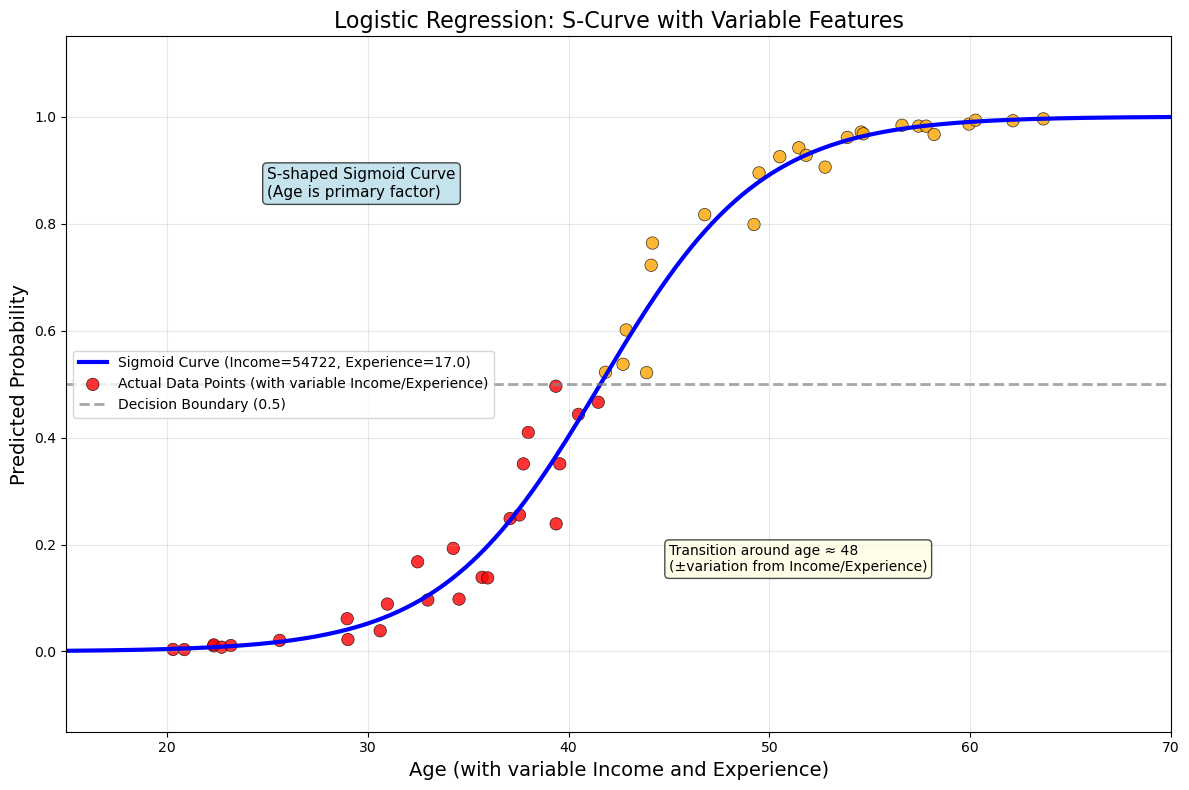

=== LOGISTIC REGRESSION SUMMARY ===
Age coefficient: 0.250 (primary driver)
Income coefficient: 0.000020 (adds variation)
Experience coefficient: 0.030 (adds variation)

Decision boundary at probability = 0.5
Transition point (z=0) occurs around age = 48.0

Variable ranges:
  Age: 20.3 - 63.6 years
  Income: $30276 - $79344
  Experience: 5.2 - 29.3 years

Outcomes:
  No Purchase (y=0): 26 people
  Purchase (y=1): 24 people
  Probability range: 0.004 to 0.996

=== FEATURE IMPACT EXAMPLES ===
Highest probability (0.996):
  Age: 63.6, Income: $58064, Experience: 12.5
Lowest probability (0.004):
  Age: 20.9, Income: $34425, Experience: 15.3


In [44]:
# Create the S-curve plot with variable income and experience
# Use mean values for the main curve, but show actual data points with their real values
income_mean = df['Income'].mean()
experience_mean = df['Experience'].mean()

# Create a wide age range to show the full S-curve (using mean income/experience)
age_range = np.linspace(15, 70, 300)  # More points for smoother curve
X_plot = np.column_stack((
    np.ones(300),
    age_range,
    np.full(300, income_mean),
    np.full(300, experience_mean)
))

# Use the same weights as in data generation
w_vector = np.array([w0, w_age, w_income, w_experience]).reshape(-1,1)
z_plot = X_plot @ w_vector
prob_plot = sigmoid(z_plot)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the smooth S-curve (based on mean income/experience)
plt.plot(age_range, prob_plot, color='blue', linewidth=3, 
         label=f'Sigmoid Curve (Income={income_mean:.0f}, Experience={experience_mean:.1f})')

# Plot actual data points with their individual probabilities
# Color points by their actual outcome, but position them at their actual probability
colors = ['red' if y_val == 0 else 'orange' for y_val in df['Purchased (y)']]
scatter = plt.scatter(df['Age'], df['Predicted Probability'], c=colors, s=80, alpha=0.8, 
                     edgecolors='black', linewidth=0.5, 
                     label='Actual Data Points (with variable Income/Experience)')

# Add a horizontal line at 0.5 to show the decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, 
           label='Decision Boundary (0.5)')

# Formatting
plt.xlabel('Age (with variable Income and Experience)', fontsize=14)
plt.ylabel('Predicted Probability', fontsize=14)
plt.title('Logistic Regression: S-Curve with Variable Features', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='center left')
plt.ylim(-0.15, 1.15)
plt.xlim(15, 70)

# Add text annotations
plt.text(25, 0.85, 'S-shaped Sigmoid Curve\n(Age is primary factor)', fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
plt.text(45, 0.15, f'Transition around age ≈ {-w0/w_age:.0f}\n(±variation from Income/Experience)', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Print detailed summary statistics
print(f"=== LOGISTIC REGRESSION SUMMARY ===")
print(f"Age coefficient: {w_age:.3f} (primary driver)")
print(f"Income coefficient: {w_income:.6f} (adds variation)")
print(f"Experience coefficient: {w_experience:.3f} (adds variation)")
print(f"\nDecision boundary at probability = 0.5")
print(f"Transition point (z=0) occurs around age = {-w0/w_age:.1f}")
print(f"\nVariable ranges:")
print(f"  Age: {df['Age'].min():.1f} - {df['Age'].max():.1f} years")
print(f"  Income: ${df['Income'].min():.0f} - ${df['Income'].max():.0f}")
print(f"  Experience: {df['Experience'].min():.1f} - {df['Experience'].max():.1f} years")
print(f"\nOutcomes:")
print(f"  No Purchase (y=0): {sum(df['Purchased (y)'] == 0)} people")
print(f"  Purchase (y=1): {sum(df['Purchased (y)'] == 1)} people")
print(f"  Probability range: {df['Predicted Probability'].min():.3f} to {df['Predicted Probability'].max():.3f}")

# Show how income/experience affect individual predictions
print(f"\n=== FEATURE IMPACT EXAMPLES ===")
high_prob_idx = df['Predicted Probability'].idxmax()
low_prob_idx = df['Predicted Probability'].idxmin()
print(f"Highest probability ({df.loc[high_prob_idx, 'Predicted Probability']:.3f}):")
print(f"  Age: {df.loc[high_prob_idx, 'Age']:.1f}, Income: ${df.loc[high_prob_idx, 'Income']:.0f}, Experience: {df.loc[high_prob_idx, 'Experience']:.1f}")
print(f"Lowest probability ({df.loc[low_prob_idx, 'Predicted Probability']:.3f}):")
print(f"  Age: {df.loc[low_prob_idx, 'Age']:.1f}, Income: ${df.loc[low_prob_idx, 'Income']:.0f}, Experience: {df.loc[low_prob_idx, 'Experience']:.1f}")

## Model Comparison: Feature Selection Impact

Now let's compare three different logistic regression models to understand how adding more features affects the predictions:

1. **Model 1**: Age only (keeping income and experience constant)
2. **Model 2**: Age + Income (keeping experience constant)  
3. **Model 3**: Age + Income + Experience (all features)

This comparison will help us understand:
- How each feature contributes to the prediction
- How model complexity affects the decision boundary
- The trade-off between simplicity and accuracy

### Model 1: Age Only - Matrix Formulation

In this model, we use **only age** as a predictor while keeping income and experience **constant** at their mean values.

**Matrix Setup:**
$$X_1 = \begin{bmatrix}
1 & \text{age}_1 & \bar{\text{income}} & \bar{\text{experience}} \\
1 & \text{age}_2 & \bar{\text{income}} & \bar{\text{experience}} \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \bar{\text{income}} & \bar{\text{experience}}
\end{bmatrix}_{n \times 4}$$

**Weight Vector:**
$$w_1 = \begin{bmatrix}
w_0 \\ w_{\text{age}} \\ 0 \\ 0
\end{bmatrix}_{4 \times 1}$$

**Linear Combination:**
$$z_1 = X_1 w_1 = w_0 + w_{\text{age}} \cdot \text{age}_i + 0 \cdot \bar{\text{income}} + 0 \cdot \bar{\text{experience}}$$

**Simplified:**
$$z_1 = w_0 + w_{\text{age}} \cdot \text{age}_i$$

**Probability:**
$$P(\text{purchase}_i) = \sigma(z_1) = \frac{1}{1 + e^{-(w_0 + w_{\text{age}} \cdot \text{age}_i)}}$$

This creates a **pure age-based model** where only age determines the purchase probability.

In [45]:
# MODEL 1: Age Only (Income and Experience held constant)
print("=== MODEL 1: AGE ONLY ===")

# Use the same data but fix income and experience at their mean values
income_constant = df['Income'].mean()
experience_constant = df['Experience'].mean()

# Create matrix with age + constant income/experience
X1 = np.column_stack((
    np.ones(n_samples),                    # bias term
    df['Age'],                             # age (variable)
    np.full(n_samples, income_constant),   # income (constant)
    np.full(n_samples, experience_constant) # experience (constant)
))

# Simple weights - only age matters, others are zero
w1_age = 0.25
w1_income = 0.0     # No effect
w1_experience = 0.0 # No effect
w1_bias = -12

w1 = np.array([w1_bias, w1_age, w1_income, w1_experience]).reshape(-1,1)

# Calculate probabilities and predictions
z1 = X1 @ w1
prob1 = sigmoid(z1)
pred1 = (prob1.flatten() >= 0.5).astype(int)

print(f"Age coefficient: {w1_age}")
print(f"Income coefficient: {w1_income} (held constant at ${income_constant:.0f})")
print(f"Experience coefficient: {w1_experience} (held constant at {experience_constant:.1f} years)")
print(f"Transition age: {-w1_bias/w1_age:.1f} years")
print(f"Accuracy: {np.mean(pred1 == df['Purchased (y)']):.3f}")
print(f"Predicted purchases: {sum(pred1)}/{len(pred1)}")
print()

=== MODEL 1: AGE ONLY ===
Age coefficient: 0.25
Income coefficient: 0.0 (held constant at $54722)
Experience coefficient: 0.0 (held constant at 17.0 years)
Transition age: 48.0 years
Accuracy: 0.860
Predicted purchases: 17/50



In [46]:
# MODEL 2: Age + Income (Experience held constant)
print("=== MODEL 2: AGE + INCOME ===")

# Create matrix with age + income (variable) + constant experience
X2 = np.column_stack((
    np.ones(n_samples),                    # bias term
    df['Age'],                             # age (variable)
    df['Income'],                          # income (variable)
    np.full(n_samples, experience_constant) # experience (constant)
))

# Weights for age and income, experience set to zero
w2_age = 0.20       # Slightly reduced since income also contributes
w2_income = 0.00003 # Income effect
w2_experience = 0.0 # No effect (held constant)
w2_bias = -12

w2 = np.array([w2_bias, w2_age, w2_income, w2_experience]).reshape(-1,1)

# Calculate probabilities and predictions
z2 = X2 @ w2
prob2 = sigmoid(z2)
pred2 = (prob2.flatten() >= 0.5).astype(int)

print(f"Age coefficient: {w2_age}")
print(f"Income coefficient: {w2_income}")
print(f"Experience coefficient: {w2_experience} (held constant at {experience_constant:.1f} years)")
print(f"Base transition age (at mean income): {-w2_bias/w2_age:.1f} years")
print(f"Income effect: +$10K income ≈ {10000 * w2_income / w2_age:.1f} years younger")
print(f"Accuracy: {np.mean(pred2 == df['Purchased (y)']):.3f}")
print(f"Predicted purchases: {sum(pred2)}/{len(pred2)}")
print()

=== MODEL 2: AGE + INCOME ===
Age coefficient: 0.2
Income coefficient: 3e-05
Experience coefficient: 0.0 (held constant at 17.0 years)
Base transition age (at mean income): 60.0 years
Income effect: +$10K income ≈ 1.5 years younger
Accuracy: 0.780
Predicted purchases: 13/50



### Model 2: Age + Income - Matrix Formulation

In this model, we use **age and income** as predictors while keeping experience **constant** at its mean value.

**Matrix Setup:**
$$X_2 = \begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 & \bar{\text{experience}} \\
1 & \text{age}_2 & \text{income}_2 & \bar{\text{experience}} \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n & \bar{\text{experience}}
\end{bmatrix}_{n \times 4}$$

**Weight Vector:**
$$w_2 = \begin{bmatrix}
w_0 \\ w_{\text{age}} \\ w_{\text{income}} \\ 0
\end{bmatrix}_{4 \times 1}$$

**Linear Combination:**
$$z_2 = X_2 w_2 = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + 0 \cdot \bar{\text{experience}}$$

**Simplified:**
$$z_2 = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i$$

**Probability:**
$$P(\text{purchase}_i) = \sigma(z_2) = \frac{1}{1 + e^{-(w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i)}}$$

This creates an **age-income interaction model** where both age and individual income levels affect the purchase probability, adding more nuanced predictions than the age-only model.

In [47]:
# MODEL 3: Age + Income + Experience (All features)
print("=== MODEL 3: ALL FEATURES ===")

# Use original matrix with all features
X3 = X  # This is the original matrix from earlier

# Use original weights (all features contribute)
w3_age = 0.18           # Reduced as other features also contribute
w3_income = 0.00002     # Income effect
w3_experience = 0.04    # Experience effect
w3_bias = -12

w3 = np.array([w3_bias, w3_age, w3_income, w3_experience]).reshape(-1,1)

# Calculate probabilities and predictions
z3 = X3 @ w3
prob3 = sigmoid(z3)
pred3 = (prob3.flatten() >= 0.5).astype(int)

print(f"Age coefficient: {w3_age}")
print(f"Income coefficient: {w3_income}")
print(f"Experience coefficient: {w3_experience}")
print(f"Base transition age: {-w3_bias/w3_age:.1f} years")
print(f"Income effect: +$10K income ≈ {10000 * w3_income / w3_age:.1f} years younger")
print(f"Experience effect: +10 years exp ≈ {10 * w3_experience / w3_age:.1f} years younger")
print(f"Accuracy: {np.mean(pred3 == df['Purchased (y)']):.3f}")
print(f"Predicted purchases: {sum(pred3)}/{len(pred3)}")
print()

# Compare all models
print("=== MODEL COMPARISON SUMMARY ===")
print(f"Model 1 (Age only):        Accuracy = {np.mean(pred1 == df['Purchased (y)']):.3f}")
print(f"Model 2 (Age + Income):    Accuracy = {np.mean(pred2 == df['Purchased (y)']):.3f}")
print(f"Model 3 (All features):    Accuracy = {np.mean(pred3 == df['Purchased (y)']):.3f}")
print()
print("Feature importance ranking:")
print("1. Age (primary factor in all models)")
print("2. Experience (moderate effect)")
print("3. Income (smaller effect)")

=== MODEL 3: ALL FEATURES ===
Age coefficient: 0.18
Income coefficient: 2e-05
Experience coefficient: 0.04
Base transition age: 66.7 years
Income effect: +$10K income ≈ 1.1 years younger
Experience effect: +10 years exp ≈ 2.2 years younger
Accuracy: 0.660
Predicted purchases: 7/50

=== MODEL COMPARISON SUMMARY ===
Model 1 (Age only):        Accuracy = 0.860
Model 2 (Age + Income):    Accuracy = 0.780
Model 3 (All features):    Accuracy = 0.660

Feature importance ranking:
1. Age (primary factor in all models)
2. Experience (moderate effect)
3. Income (smaller effect)


### Model 3: All Features - Matrix Formulation

In this model, we use **all features** (age, income, and experience) as predictors for the most comprehensive model.

**Matrix Setup:**
$$X_3 = \begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 & \text{experience}_1 \\
1 & \text{age}_2 & \text{income}_2 & \text{experience}_2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n & \text{experience}_n
\end{bmatrix}_{n \times 4}$$

**Weight Vector:**
$$w_3 = \begin{bmatrix}
w_0 \\ w_{\text{age}} \\ w_{\text{income}} \\ w_{\text{experience}}
\end{bmatrix}_{4 \times 1}$$

**Linear Combination:**
$$z_3 = X_3 w_3 = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + w_{\text{experience}} \cdot \text{experience}_i$$

**Probability:**
$$P(\text{purchase}_i) = \sigma(z_3) = \frac{1}{1 + e^{-(w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + w_{\text{experience}} \cdot \text{experience}_i)}}$$

**Feature Interactions:**
This full model captures the **combined effect** of all three features:
- **Age**: Primary life stage factor
- **Income**: Financial capacity factor  
- **Experience**: Professional development factor

The model can capture complex interactions where, for example, a younger person with high income and experience might have similar purchase probability as an older person with moderate income and experience.

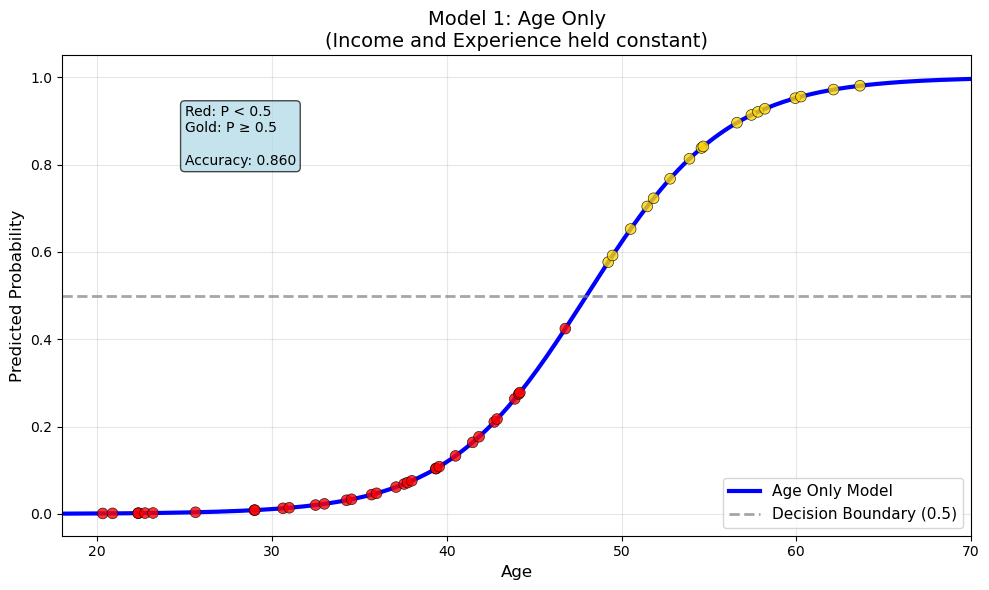

In [48]:
# Model 1 Visualization: Age Only
plt.figure(figsize=(10, 6))

# Create age range for plotting curves
age_range = np.linspace(18, 70, 200)

# Model 1: Age only curve
X_plot1 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, income_constant),
    np.full(200, experience_constant)
))
prob_plot1 = sigmoid(X_plot1 @ w1)

plt.plot(age_range, prob_plot1, 'b-', linewidth=3, label='Age Only Model')

# Color points based on their ACTUAL PROBABILITY (not outcome)
# Red for probabilities < 0.5, Yellow for probabilities >= 0.5
colors1 = ['red' if p < 0.5 else 'gold' for p in prob1.flatten()]
plt.scatter(df['Age'], prob1.flatten(), c=colors1, alpha=0.8, s=60, 
           edgecolors='black', linewidth=0.5, zorder=5)

# Decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, 
           label='Decision Boundary (0.5)')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Model 1: Age Only\n(Income and Experience held constant)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.05, 1.05)
plt.xlim(18, 70)

# Add annotation
plt.text(25, 0.8, f'Red: P < 0.5\nGold: P ≥ 0.5\n\nAccuracy: {np.mean(pred1 == df["Purchased (y)"]):.3f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

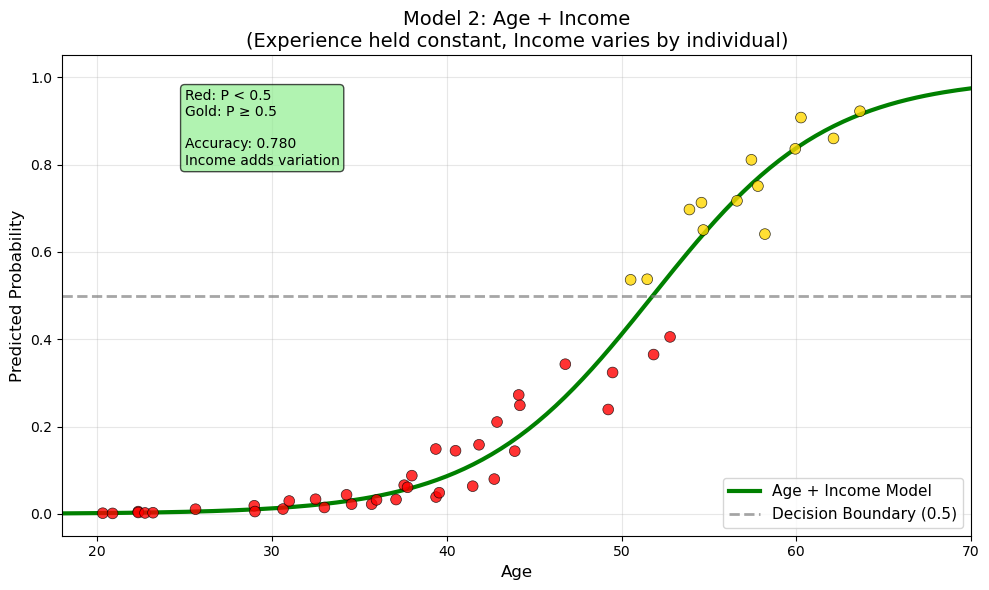

In [49]:
# Model 2 Visualization: Age + Income
plt.figure(figsize=(10, 6))

# Model 2: Age + Income curve (using mean income for the curve)
X_plot2 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, df['Income'].mean()),  # Use mean income for the curve
    np.full(200, experience_constant)
))
prob_plot2 = sigmoid(X_plot2 @ w2)

plt.plot(age_range, prob_plot2, 'g-', linewidth=3, label='Age + Income Model')

# Color points based on their ACTUAL PROBABILITY (not outcome)
# Red for probabilities < 0.5, Yellow for probabilities >= 0.5
colors2 = ['red' if p < 0.5 else 'gold' for p in prob2.flatten()]
plt.scatter(df['Age'], prob2.flatten(), c=colors2, alpha=0.8, s=60, 
           edgecolors='black', linewidth=0.5, zorder=5)

# Decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, 
           label='Decision Boundary (0.5)')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Model 2: Age + Income\n(Experience held constant, Income varies by individual)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.05, 1.05)
plt.xlim(18, 70)

# Add annotation
plt.text(25, 0.8, f'Red: P < 0.5\nGold: P ≥ 0.5\n\nAccuracy: {np.mean(pred2 == df["Purchased (y)"]):.3f}\nIncome adds variation', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.show()

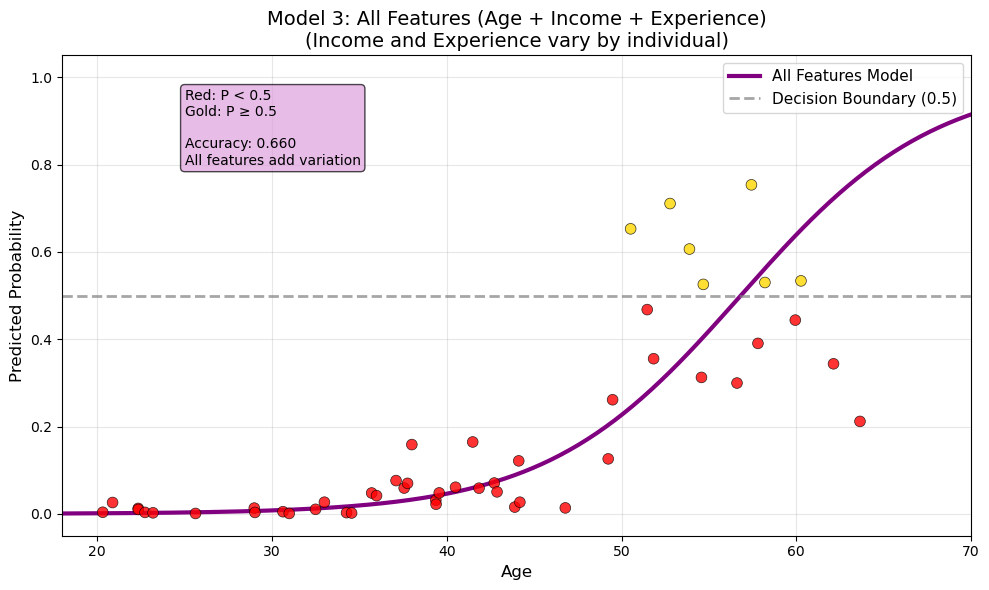

In [50]:
# Model 3 Visualization: All Features (Age + Income + Experience)
plt.figure(figsize=(10, 6))

# Model 3: All features curve (using mean income and experience for the curve)
X_plot3 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, df['Income'].mean()),      # Use mean income for the curve
    np.full(200, df['Experience'].mean())   # Use mean experience for the curve
))
prob_plot3 = sigmoid(X_plot3 @ w3)

plt.plot(age_range, prob_plot3, 'purple', linewidth=3, label='All Features Model')

# Color points based on their ACTUAL PROBABILITY (not outcome)
# Red for probabilities < 0.5, Yellow for probabilities >= 0.5
colors3 = ['red' if p < 0.5 else 'gold' for p in prob3.flatten()]
plt.scatter(df['Age'], prob3.flatten(), c=colors3, alpha=0.8, s=60, 
           edgecolors='black', linewidth=0.5, zorder=5)

# Decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, 
           label='Decision Boundary (0.5)')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Model 3: All Features (Age + Income + Experience)\n(Income and Experience vary by individual)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.05, 1.05)
plt.xlim(18, 70)

# Add annotation
plt.text(25, 0.8, f'Red: P < 0.5\nGold: P ≥ 0.5\n\nAccuracy: {np.mean(pred3 == df["Purchased (y)"]):.3f}\nAll features add variation', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum", alpha=0.7))

plt.tight_layout()
plt.show()

In [51]:
# Create a detailed comparison table
print("=== DETAILED MODEL COMPARISON ===")
comparison_data = {
    'Model': ['Age Only', 'Age + Income', 'All Features'],
    'Features Used': ['Age', 'Age, Income', 'Age, Income, Experience'],
    'Age Coefficient': [w1_age, w2_age, w3_age],
    'Income Coefficient': [w1_income, w2_income, w3_income],
    'Experience Coefficient': [w1_experience, w2_experience, w3_experience],
    'Accuracy': [
        f"{np.mean(pred1 == df['Purchased (y)']):.3f}",
        f"{np.mean(pred2 == df['Purchased (y)']):.3f}",
        f"{np.mean(pred3 == df['Purchased (y)']):.3f}"
    ],
    'Predictions (Yes/Total)': [
        f"{sum(pred1)}/{len(pred1)}",
        f"{sum(pred2)}/{len(pred2)}",
        f"{sum(pred3)}/{len(pred3)}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n=== KEY INSIGHTS ===")
print("• Model complexity increases from left to right")
print("• Age coefficient decreases as more features are added")
print("• Additional features provide more nuanced predictions")
print("• Color coding: Red points have P < 0.5, Gold points have P ≥ 0.5")
print("• Decision boundary at P = 0.5 determines final classification")

# Count points by color for each model
red1 = sum(1 for p in prob1.flatten() if p < 0.5)
gold1 = sum(1 for p in prob1.flatten() if p >= 0.5)
red2 = sum(1 for p in prob2.flatten() if p < 0.5)
gold2 = sum(1 for p in prob2.flatten() if p >= 0.5)
red3 = sum(1 for p in prob3.flatten() if p < 0.5)
gold3 = sum(1 for p in prob3.flatten() if p >= 0.5)

print(f"\n=== POINT DISTRIBUTION ===")
print(f"Model 1: {red1} red points (P<0.5), {gold1} gold points (P≥0.5)")
print(f"Model 2: {red2} red points (P<0.5), {gold2} gold points (P≥0.5)")
print(f"Model 3: {red3} red points (P<0.5), {gold3} gold points (P≥0.5)")

=== DETAILED MODEL COMPARISON ===
       Model           Features Used  Age Coefficient  Income Coefficient  Experience Coefficient Accuracy Predictions (Yes/Total)
    Age Only                     Age             0.25             0.00000                    0.00    0.860                   17/50
Age + Income             Age, Income             0.20             0.00003                    0.00    0.780                   13/50
All Features Age, Income, Experience             0.18             0.00002                    0.04    0.660                    7/50

=== KEY INSIGHTS ===
• Model complexity increases from left to right
• Age coefficient decreases as more features are added
• Additional features provide more nuanced predictions
• Color coding: Red points have P < 0.5, Gold points have P ≥ 0.5
• Decision boundary at P = 0.5 determines final classification

=== POINT DISTRIBUTION ===
Model 1: 33 red points (P<0.5), 17 gold points (P≥0.5)
Model 2: 37 red points (P<0.5), 13 gold points (P≥